# <font color=red>K-means Clustering <font>

### 1. Analyze the dataset to determine the useful features K-Means clustering

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
print(wine.feature_names)
print(wine.data.shape)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
(178, 13)


In [169]:
wine_pd = pd.DataFrame(wine.data)
wine_pd.columns = wine.feature_names
wine_pd.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
pp.ProfileReport(wine_pd)

Number of variables,13
Number of observations,178
Total Missing (%),0.0%
Total size in memory,18.2 KiB
Average record size in memory,104.4 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


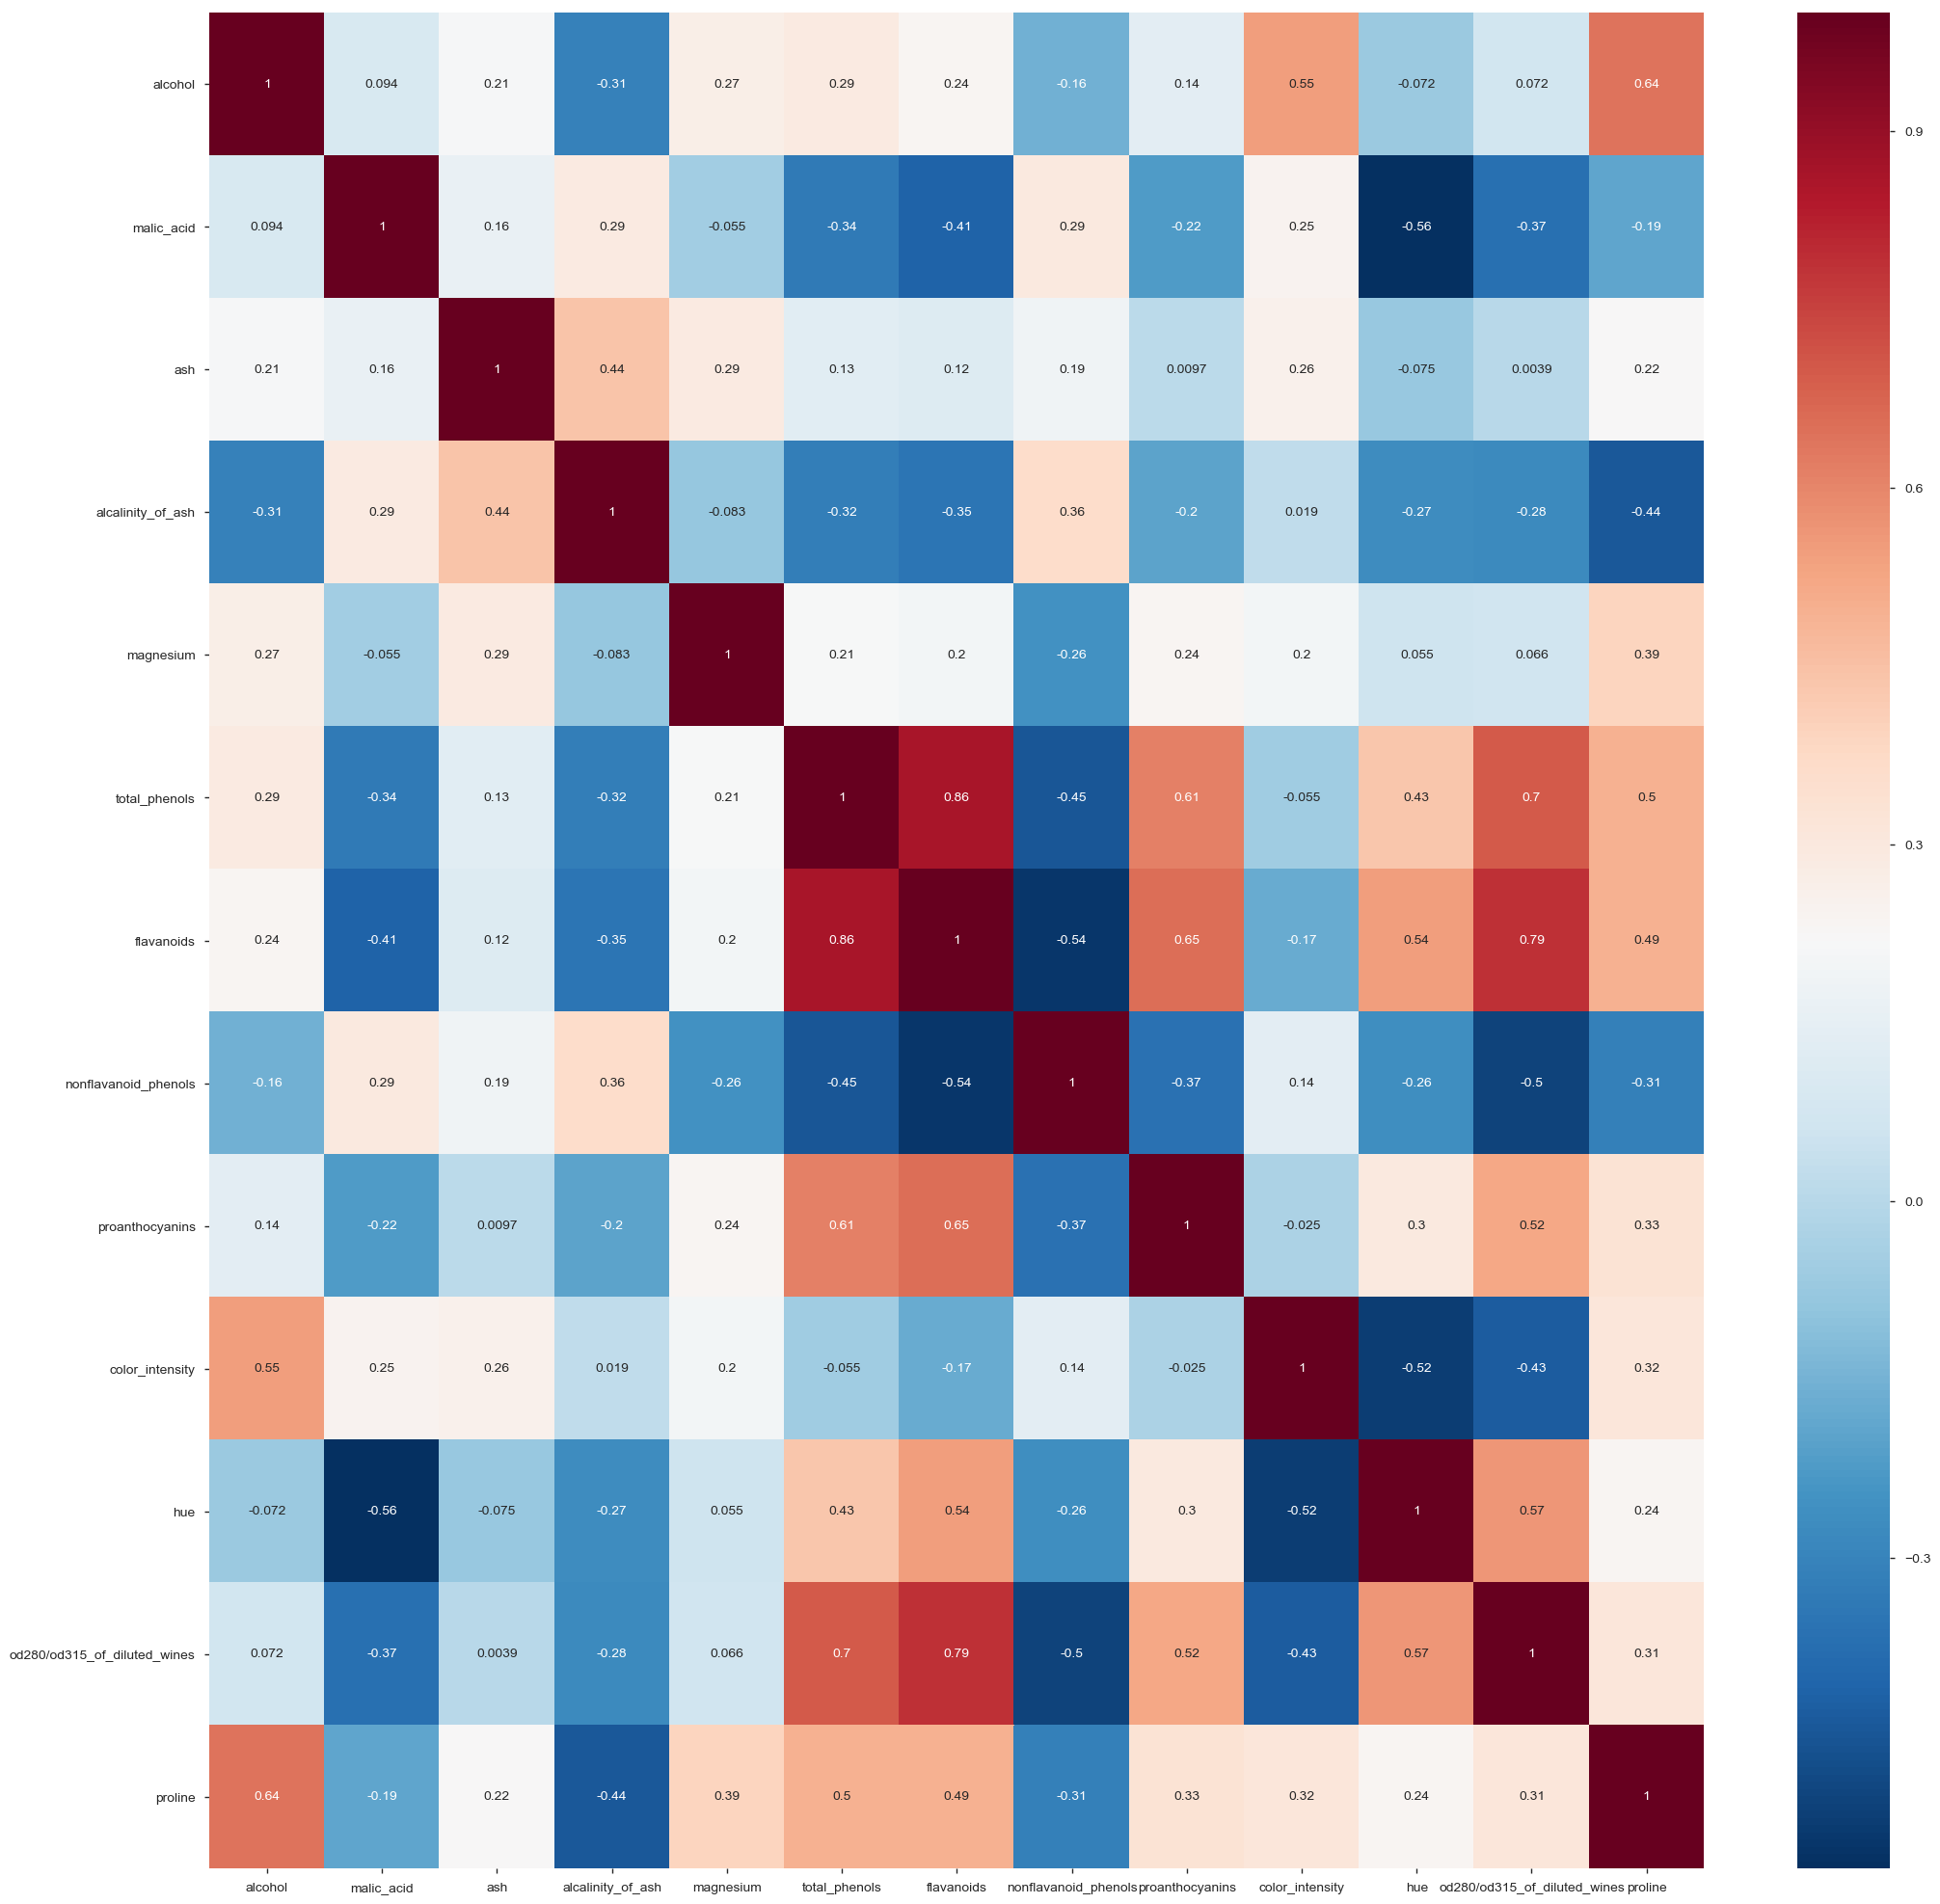

In [15]:
cor = wine_pd.corr()
plt.figure(figsize=(25,25))
sns.heatmap(cor, annot=True, cmap ="RdBu_r");

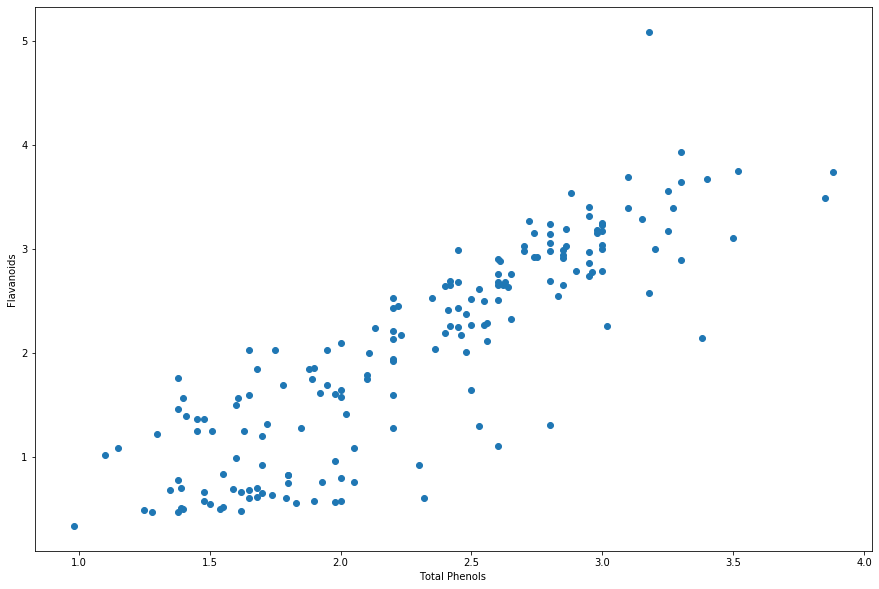

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(wine_pd.total_phenols, wine_pd.flavanoids)
plt.xlabel('Total Phenols')
plt.ylabel('Flavanoids')
plt.show()

### 2. Display the clustering results using scatter plot. Mark the centroids and annotate the plot to indicate the clusters.

In [170]:
from sklearn.cluster import KMeans

init_centroids = np.array([[1.7,1.7],[3.0,3.0]])
kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)
kmeans.fit(wine_pd.iloc[:,5:7])

KMeans(algorithm='auto', copy_x=True,
       init=array([[1.7, 1.7],
       [3. , 3. ]]), max_iter=300, n_clusters=2,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [171]:
print(kmeans.cluster_centers_)

[[1.757 1.131]
 [2.787 2.85 ]]


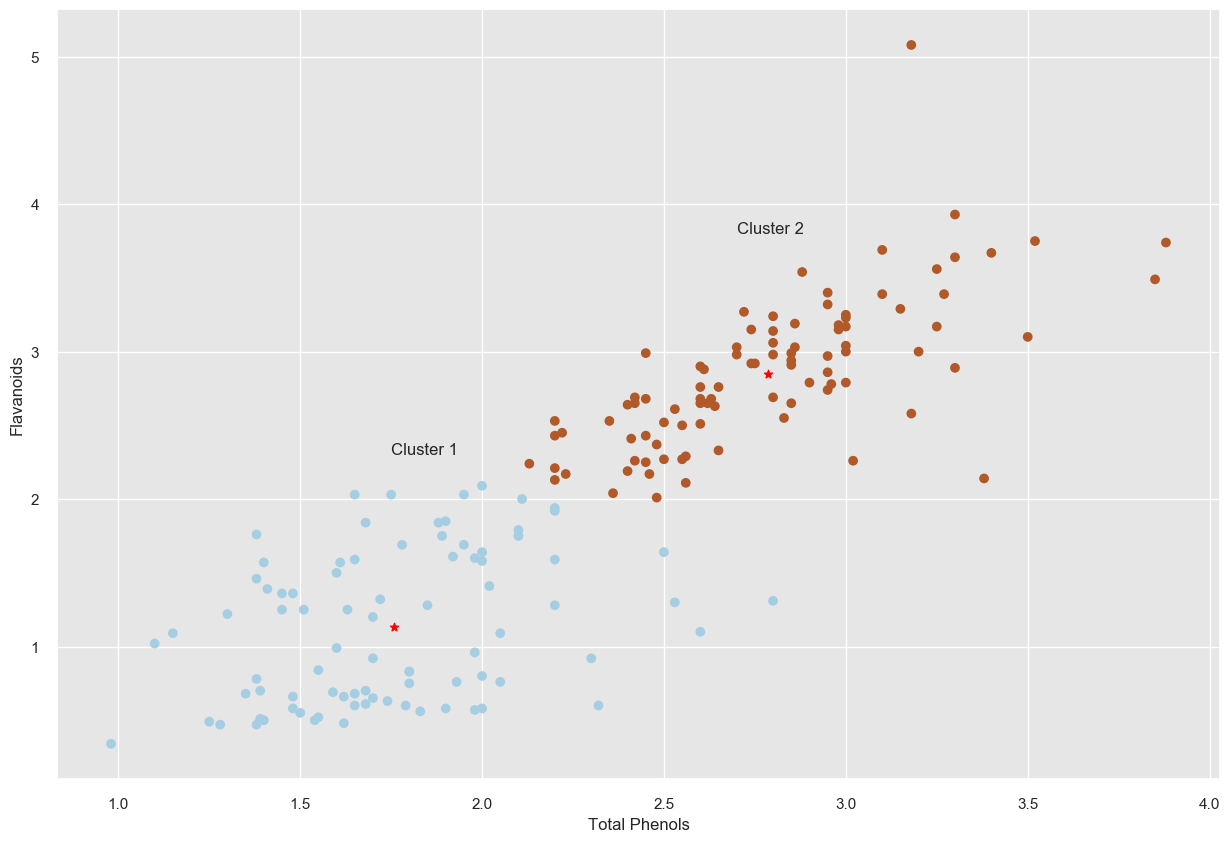

In [177]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(wine_pd.total_phenols, wine_pd.flavanoids, c=kmeans.labels_, cmap=plt.cm.Paired)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', color='red')
plt.xlabel('Total Phenols')
plt.ylabel('Flavanoids')
ax.annotate('Cluster 1', xy=(1.75, 2.3))
ax.annotate('Cluster 2', xy=(2.7, 3.8))
plt.show()

In [178]:
init_centroids = np.array([[1.7,0.5],[2.3,2.1],[2.8,2.9]])
kmeans = KMeans(n_clusters=3, init=init_centroids, n_init=1)
kmeans.fit(wine_pd.iloc[:,5:7])

KMeans(algorithm='auto', copy_x=True,
       init=array([[1.7, 0.5],
       [2.3, 2.1],
       [2.8, 2.9]]),
       max_iter=300, n_clusters=3, n_init=1, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [179]:
print(kmeans.cluster_centers_)

[[1.621 0.838]
 [2.183 1.958]
 [2.918 3.035]]


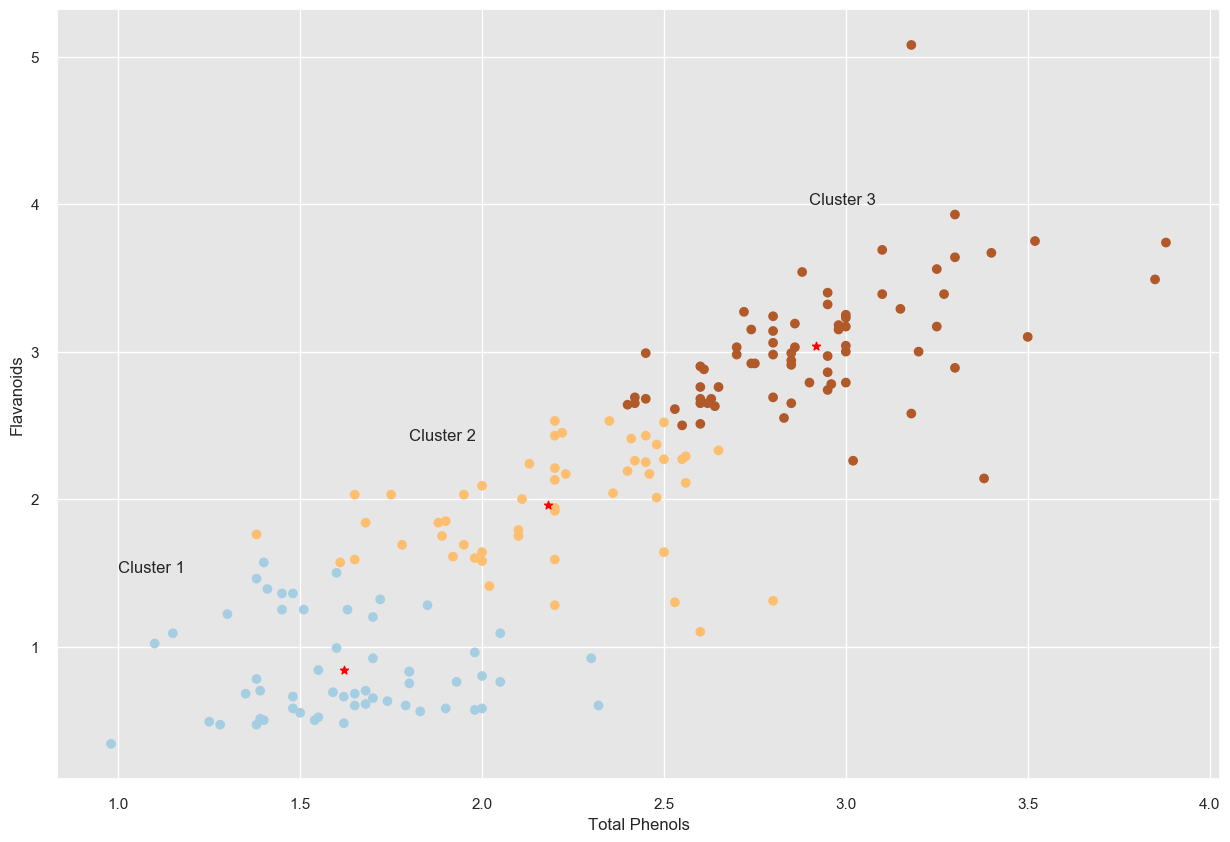

In [180]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(wine_pd.total_phenols, wine_pd.flavanoids, c=kmeans.labels_, cmap=plt.cm.Paired)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', color='red')
plt.xlabel('Total Phenols')
plt.ylabel('Flavanoids')
ax.annotate('Cluster 1', xy=(1.0, 1.5))
ax.annotate('Cluster 2', xy=(1.8, 2.4))
ax.annotate('Cluster 3', xy=(2.9, 4.0))
plt.show()

### 3. Evaluate the clustering model and display its confusion matrix and classification report.

##### Making sure kmeans clustering model labels the data points correctly by cross referencing them with the data points of the target variable. Then modify the labels accordingly.

In [181]:
print(kmeans.labels_)

[2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 1 2 1 2 2 1 1 0 0 2 1 2
 2 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 0 0 0 1 2 1 0 2 2 2 1 0 1 1 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 0 1 2 2 1 2 2 2 2 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [182]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [183]:
kmodel_labels = np.copy(kmeans.labels_)
kmodel_labels[kmodel_labels==0] = 3
kmodel_labels[kmodel_labels==2] = 0
kmodel_labels[kmodel_labels==3] = 2
print(kmodel_labels)

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 0 1 0 0 1 1 2 2 0 1 0
 0 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 2 2 2 1 0 1 2 0 0 0 1 2 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 2 1 0 0 1 0 0 0 0 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


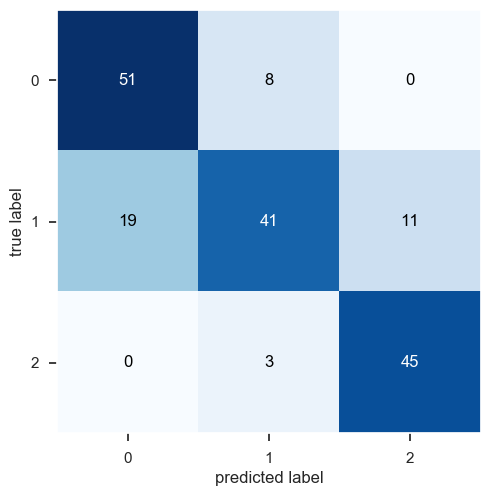

In [184]:
# this library should be imported everytime multi-dimensional confusion matrix is to be plotted
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_kmeans = confusion_matrix(y_target=wine.target, y_predicted=kmodel_labels, binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm_kmeans)
plt.show()

In [185]:
print(classification_report(wine.target, kmodel_labels))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        59
           1       0.79      0.58      0.67        71
           2       0.80      0.94      0.87        48

    accuracy                           0.77       178
   macro avg       0.77      0.79      0.77       178
weighted avg       0.77      0.77      0.76       178



# <font color=red>Agglomerative Clustering<font>

### 1. Plot the dendrogram of the data. Specify the appropriate value for the cut threshold.

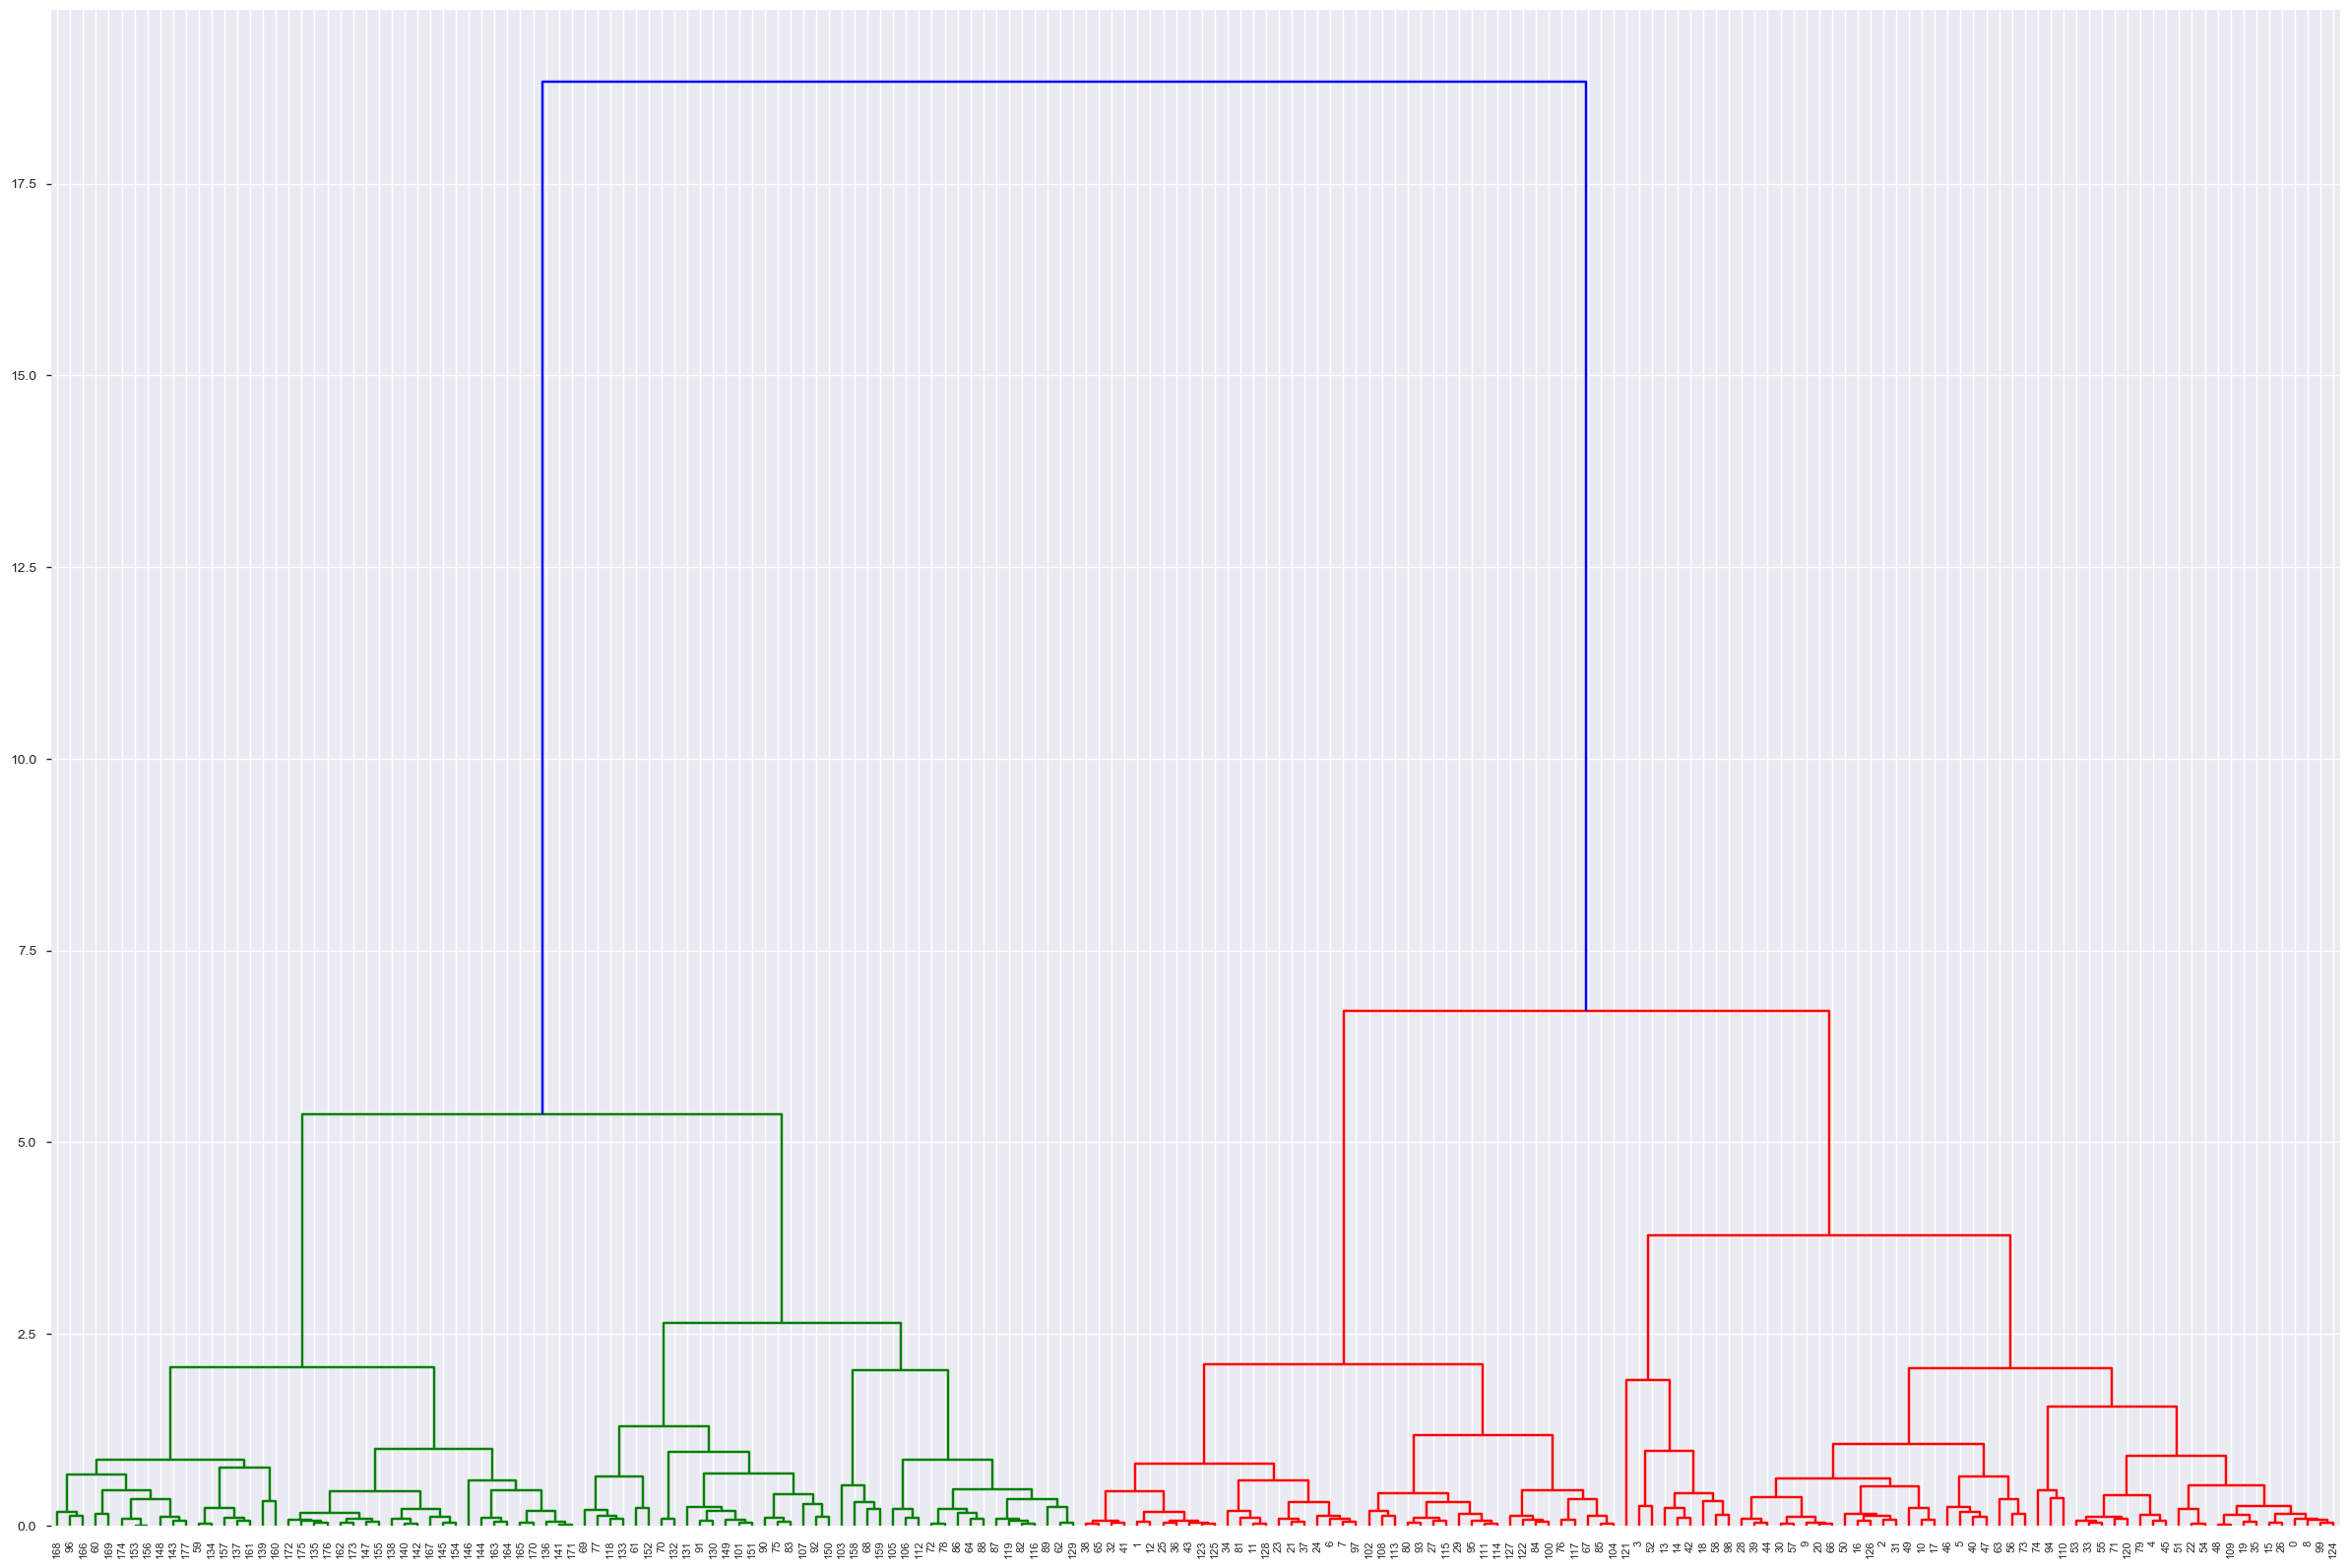

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

plt.figure(figsize=(30,20))
linked = linkage(wine_pd.iloc[:,5:7], 'ward')
dendrogram(linked, orientation='top', distance_sort='ascending', leaf_font_size=8,  show_leaf_counts=False)
#Z = hierarchy.linkage(wine_pd, 'ward')
#hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=wine_pd.index)
plt.show()

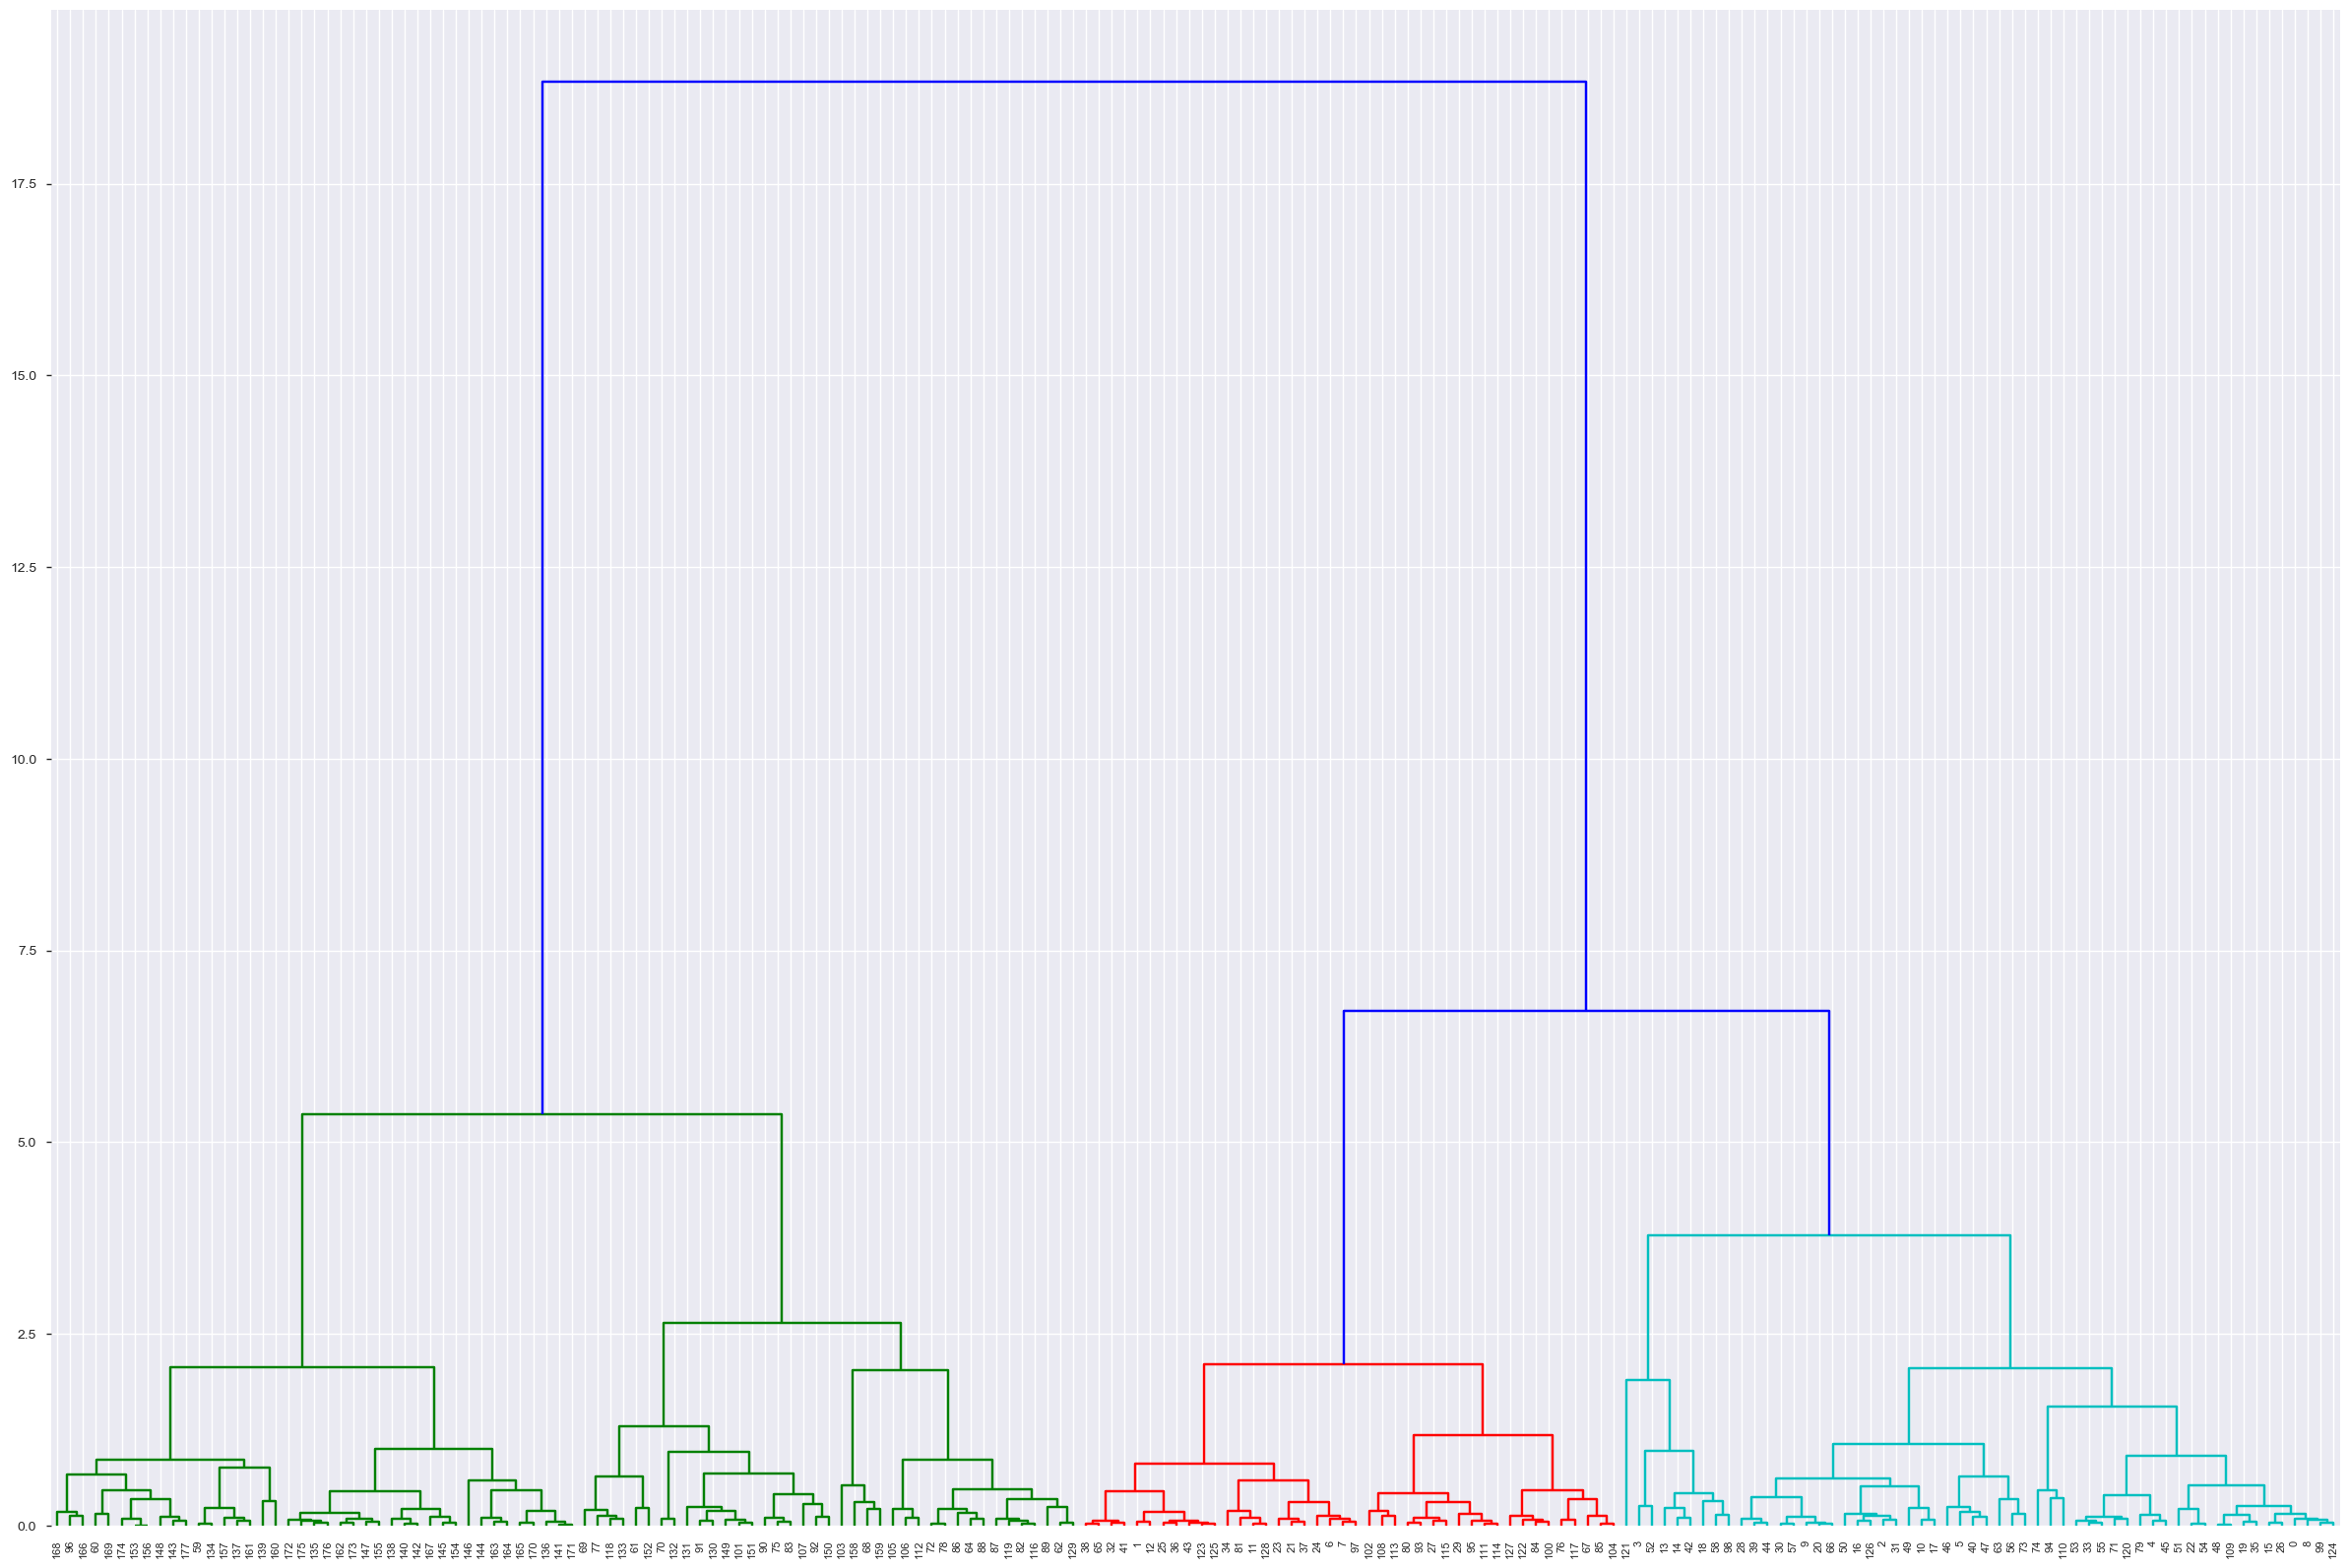

In [134]:
plt.figure(figsize=(30,20))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False, color_threshold=6.0, leaf_font_size=8)
plt.show()

### 2. Display the clustering results using scatter plot.

In [156]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
model.fit(wine_pd.iloc[:,5:7])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

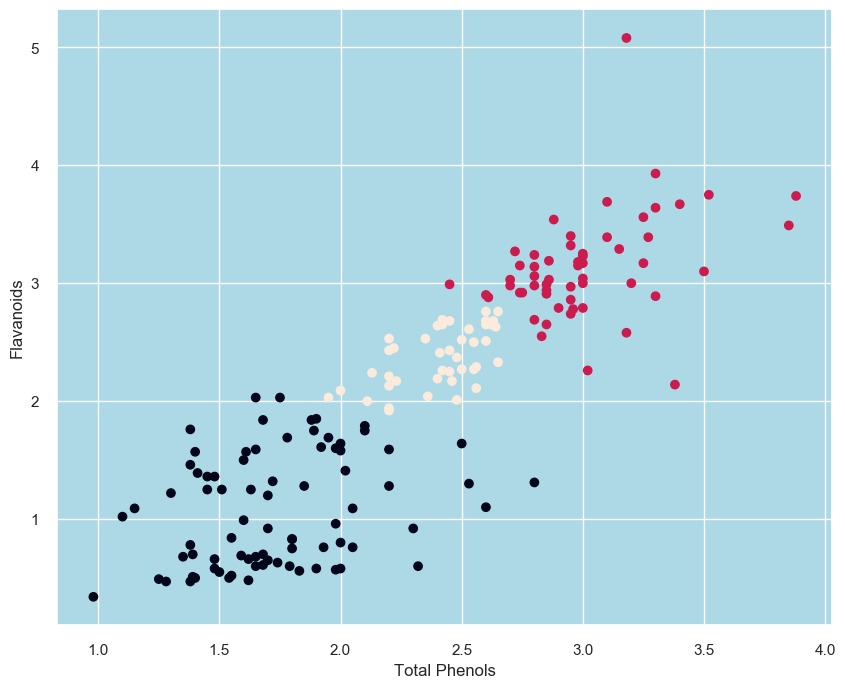

In [163]:
#sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(wine_pd.total_phenols, wine_pd.flavanoids, c=model.labels_)
plt.xlabel('Total Phenols')
plt.ylabel('Flavanoids')
plt.show()

### 3. Evaluate the clustering model and display the confusion matrix and classification report.

In [164]:
print(model.labels_)

[1 2 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 1 2 1 1 2 1 2 1 2
 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 2 1 2 0 0 0 1 0 1
 1 0 2 0 0 1 2 2 0 0 2 2 0 0 0 0 0 0 0 2 1 2 0 2 1 1 2 0 2 0 2 0 0 0 2 1 1
 2 0 2 2 2 0 2 0 0 1 1 2 2 1 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [165]:
model_labels = np.copy(model.labels_)
model_labels[model_labels==0] = 3
model_labels[model_labels==1] = 0
model_labels[model_labels==2] = 1
model_labels[model_labels==3] = 2
print(model_labels)

[0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 1 0 1 2 2 2 0 2 0
 0 2 1 2 2 0 1 1 2 2 1 1 2 2 2 2 2 2 2 1 0 1 2 1 0 0 1 2 1 2 1 2 2 2 1 0 0
 1 2 1 1 1 2 1 2 2 0 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


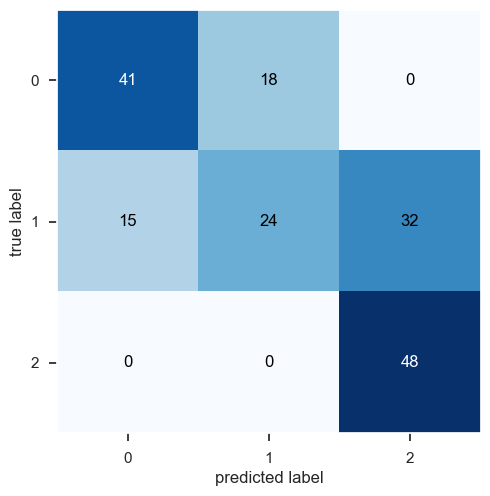

In [166]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm_agglo = confusion_matrix(y_target=wine.target, 
                      y_predicted=model_labels, 
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_agglo)
plt.show()

In [167]:
print(classification_report(wine.target, model_labels))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        59
           1       0.57      0.34      0.42        71
           2       0.60      1.00      0.75        48

    accuracy                           0.63       178
   macro avg       0.63      0.68      0.63       178
weighted avg       0.63      0.63      0.61       178



### 4. Compare and discuss the results of both cluster models (Use markup cell to discuss the results).

##### Accuracy
K-means clustering: 0.77
<br>Aggloremative clustering: 0.63

##### Number of Misclassified Lables
K-means clustering: 41
<br>Aggloremative clustering: 65


K-means clustering yields higher accuracy result compared to agglomerative clustering. This can be explained as k-means is very well suited in generating and adapting globular clusters [1]. Although the scattered data points are showing a linear plot, the shape is close to having a convex shape cluster and the data points are sparse. K-means is also more effective in handling larger amount of data as the time complexity of k-means is linear, O(n)  while hierarchical clustering is quadratic, O(n)^2 [2] [3]. As the root-mean-square error (RMSE) decreases, the performance of k-means increases and the RMSE decreases as the number of cluster decreases which might be the possibility in this case [2]. Hierarchical clustering does have advantages compared to k-means and of them is it does not have to pre-specify the number of clusters [4].

##### References

[1] 	K. Soman, S. Diwakar and V. Ajay, Data mining: theory and practice, PHI Learning Pvt. Ltd., 2006. 
<br>[2] 	M. Kaushik and B. Mathur, "Comparative study of K-means and hierarchical clustering techniques," International Journal of software and hardware research in engineering, vol. 2, no. 6, pp. 93-98, 2014. 
<br>[3] 	D. Müllner, "Modern hierarchical, agglomerative clustering algorithms," arXiv preprint arXiv:1109.2378, 2011. 
<br>[4] 	B. a. G. B. M. Boehmke, Hands-On Machine Learning with R, CRC Press, 2019. 


